In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Wrangler and Visualizer/healthcare_dataset.csv",parse_dates=["Date of Admission",'Discharge Date'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [30]:
data.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,55500.000000,55500,55500.000000,55500.000000,55500
mean,51.539459,2021-11-01 01:02:22.443243008,25539.316097,301.134829,2021-11-16 13:15:20.821621504
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13241.224652,202.000000,2020-08-12 00:00:00
50%,52.000000,2021-11-01 00:00:00,25538.069376,302.000000,2021-11-17 00:00:00
75%,68.000000,2023-02-03 00:00:00,37820.508436,401.000000,2023-02-18 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00
std,19.602454,NaN,14211.454431,115.243069,NaN


In [31]:
data['Name'] = data['Name'].str.title().str.strip()
data['Gender'] = data['Gender'].str.capitalize().str.strip()
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'], errors='coerce')
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'], errors='coerce')



missing_values = data.isnull().sum()
print(missing_values)

duplicate_rows = data.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_rows}')

unique_values = data.nunique()
print(unique_values)


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64
Number of duplicate rows: 534
Name                  40235
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64


In [32]:
data.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,55500.000000,55500,55500.000000,55500.000000,55500
mean,51.539459,2021-11-01 01:02:22.443243008,25539.316097,301.134829,2021-11-16 13:15:20.821621504
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13241.224652,202.000000,2020-08-12 00:00:00
50%,52.000000,2021-11-01 00:00:00,25538.069376,302.000000,2021-11-17 00:00:00
75%,68.000000,2023-02-03 00:00:00,37820.508436,401.000000,2023-02-18 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00
std,19.602454,NaN,14211.454431,115.243069,NaN


In [33]:
if 'Room Number' in data.columns:
    data = data.drop(columns=['Room Number'])
    print("Room Number column dropped successfully.")

Room Number column dropped successfully.


In [34]:
data.drop_duplicates(inplace=True)
print('Duplicate rows removed.')


Duplicate rows removed.


In [35]:

data['Age_bin'] = pd.cut(data['Age'], bins=[0, 30, 50, 70, 100], labels=['Young', 'Middle', 'Senior', 'Elderly'])


data.describe()



,Age,Date of Admission,Billing Amount,Discharge Date
count,54966.000000,54966,54966.000000,54966
mean,51.535185,2021-11-01 17:35:29.505512448,25544.306284,2021-11-17 05:34:28.202161408
min,13.000000,2019-05-08 00:00:00,-2008.492140,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13243.718641,2020-08-13 00:00:00
50%,52.000000,2021-11-02 00:00:00,25542.749145,2021-11-18 00:00:00
75%,68.000000,2023-02-03 00:00:00,37819.858159,2023-02-19 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,2024-06-06 00:00:00
std,19.605661,NaN,14208.409711,NaN


In [36]:
data['Length of Stay'] = (data['Discharge Date'] - data['Date of Admission']).dt.days

data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Age_bin,Length of Stay
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal,Young,2
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive,Senior,6
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal,Elderly,15
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal,Young,30
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal,Middle,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,Elective,2020-09-15,Penicillin,Abnormal,Middle,30
55496,Kyle Perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,Elective,2020-02-01,Aspirin,Normal,Senior,9
55497,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,Urgent,2020-08-10,Ibuprofen,Abnormal,Middle,28
55498,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,Elective,2019-05-31,Ibuprofen,Abnormal,Middle,6


In [37]:

median_billing = data['Billing Amount'].median()

data.loc[data['Billing Amount'] < 0, 'Billing Amount'] = median_billing



In [38]:
billing_stats = data['Billing Amount'].describe()
print("Billing Costs Analysis:")
print(billing_stats)



Billing Costs Analysis:
count    54966.000000
mean     25594.533579
std      14162.191548
min          9.238787
25%      13326.001350
50%      25542.899814
75%      37819.858159
max      52764.276736
Name: Billing Amount, dtype: float64


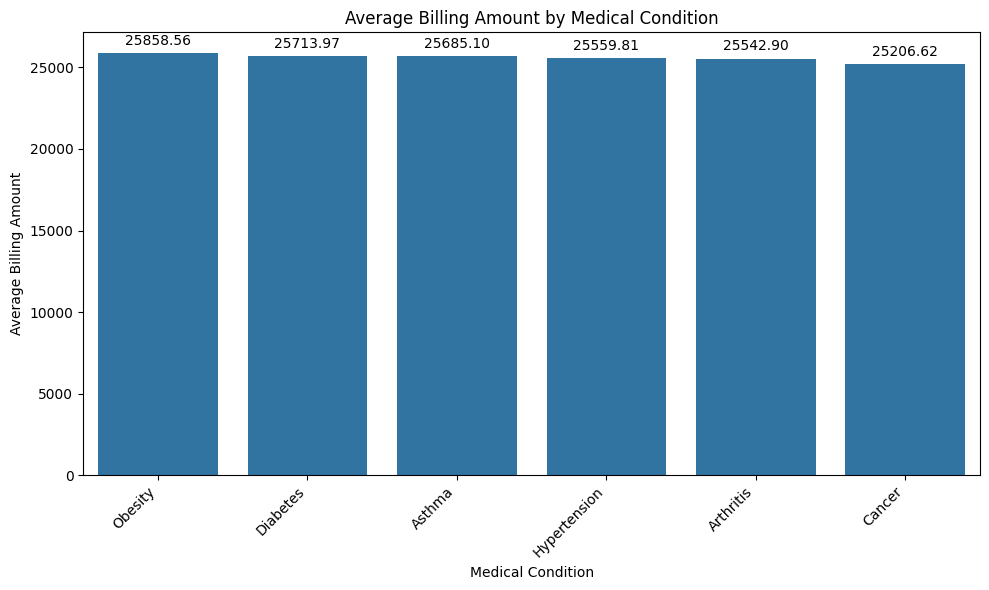

In [39]:
plt.figure(figsize=(10, 6))
billing_by_condition = data.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending=False)
sns.barplot(x=billing_by_condition.index, y=billing_by_condition.values)
plt.title('Average Billing Amount by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(billing_by_condition.values):
    plt.text(i, v + 500, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.show()



<Figure size 1200x800 with 0 Axes>

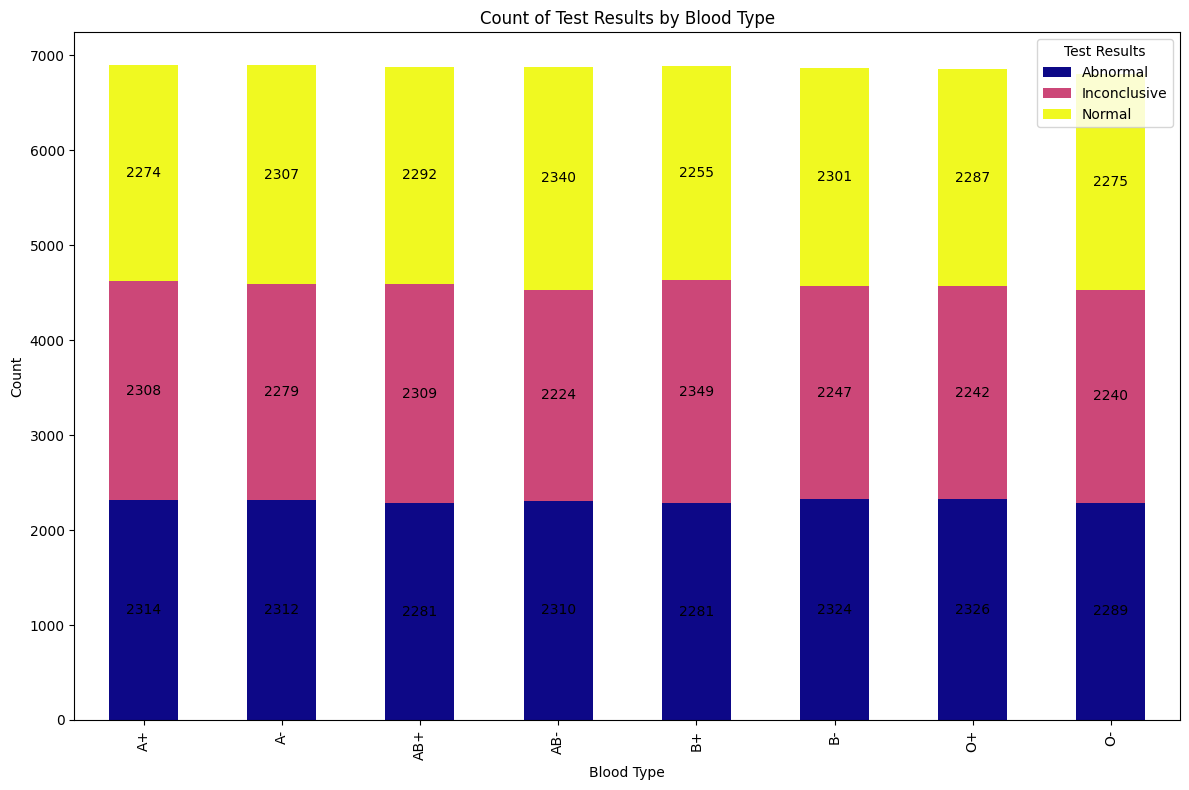

In [40]:
plt.figure(figsize=(12, 8))
test_results_blood_type = data.groupby(['Blood Type', 'Test Results']).size().unstack(fill_value=0)
ax = test_results_blood_type.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='plasma')
plt.title('Count of Test Results by Blood Type')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.legend(title='Test Results')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:
        x, y = p.get_x() + width / 2, p.get_y() + height / 2
        ax.text(x, y, f'{int(height)}', ha='center', va='center')

plt.tight_layout()
plt.show()

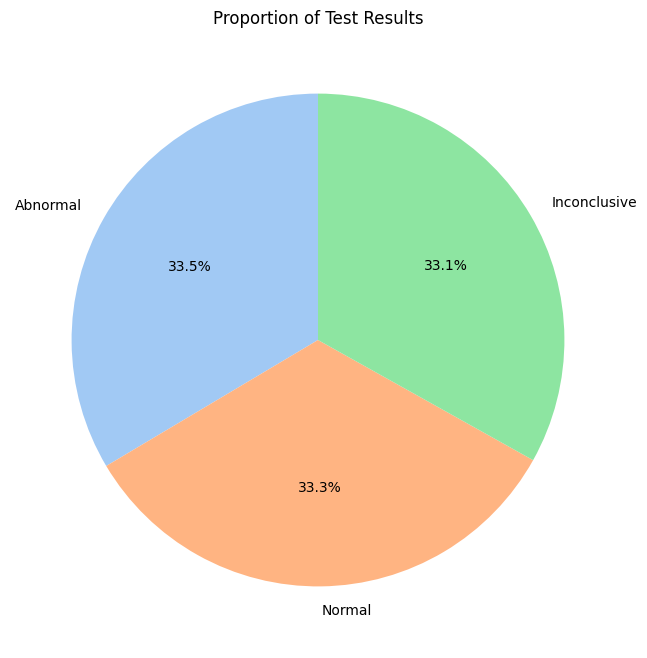

In [41]:
plt.figure(figsize=(8, 8))
test_results_counts = data['Test Results'].value_counts()
plt.pie(test_results_counts, labels=test_results_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Proportion of Test Results')
plt.show()

In [42]:
output_file = "/content/drive/MyDrive/Colab Notebooks/Wrangler and Visualizer/new_healthcare_dataset.csv"
data.to_csv(output_file, index=False)
print(f"\nTransformed data saved to {output_file}")


Transformed data saved to /content/drive/MyDrive/Colab Notebooks/Wrangler and Visualizer/new_healthcare_dataset.csv
